# Employee Salary Prediction

This notebook walks through the process of cleaning data, performing exploratory data analysis, training multiple machine learning models, and selecting the best one to predict employee salaries.

### 1. Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
# Ensure the 'adult 3.csv' file is in the same directory as this notebook
data = pd.read_csv('adult 3.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### 2. Data Cleaning and Preprocessing

In [4]:
data.shape

(48842, 15)

In [5]:
# Replace '?' with NaN to handle missing values properly
data.replace('?', np.nan, inplace=True)
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [6]:
# Drop rows with missing values
data.dropna(inplace=True)

In [7]:
# Remove rare categories from 'workclass'
data = data[data['workclass'] != 'Without-pay']
data = data[data['workclass'] != 'Never-worked']

In [8]:
# Drop redundant 'education' column
data = data.drop(columns=['education'])

### 3. Exploratory Data Analysis (EDA) - *New Section*

C:\Users\jitmo\AppData\Local\Temp\ipykernel_40980\3999770028.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income', data=data, palette='viridis')


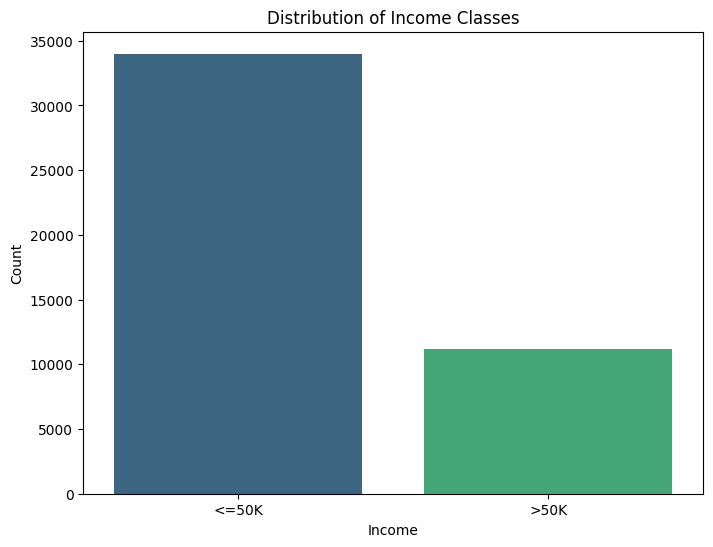

In [9]:
# Visualize the distribution of the target variable 'income'
plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=data, palette='viridis')
plt.title('Distribution of Income Classes')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

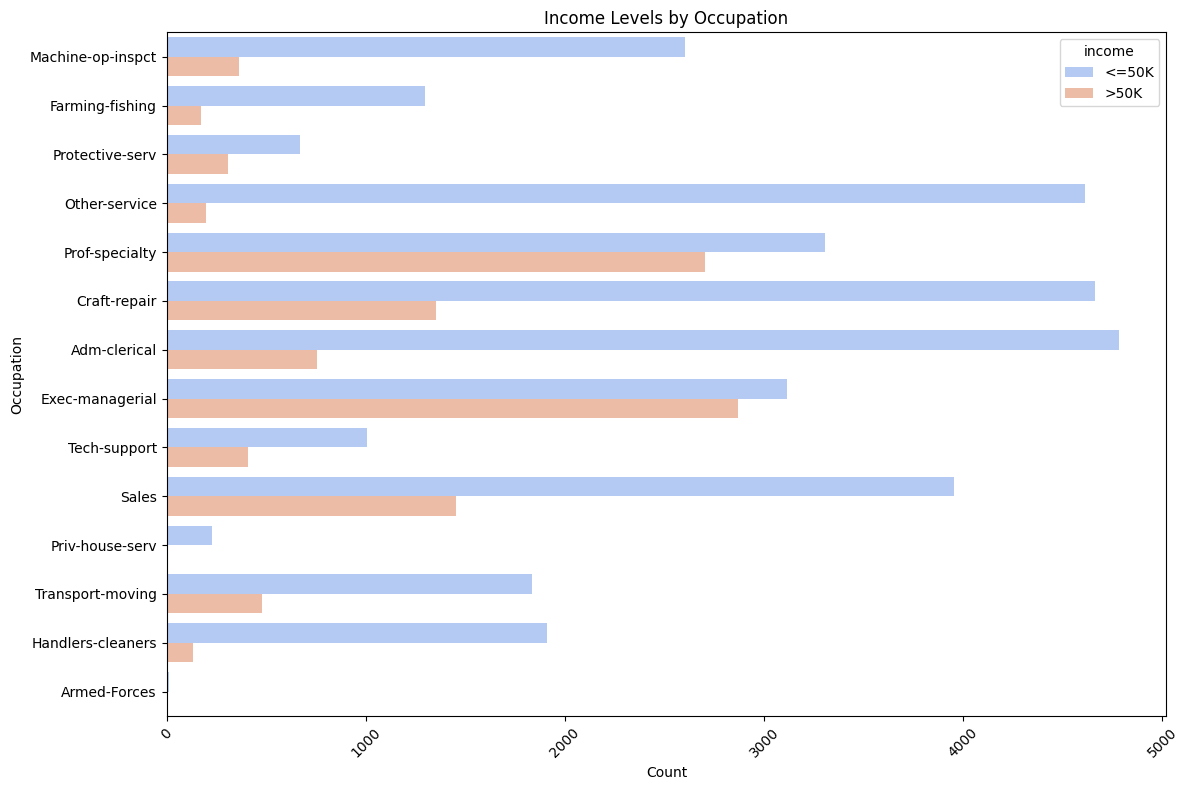

In [10]:
# Visualize the relationship between 'occupation' and 'income'
plt.figure(figsize=(12, 8))
sns.countplot(y='occupation', hue='income', data=data, palette='coolwarm')
plt.title('Income Levels by Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4. Outlier Detection

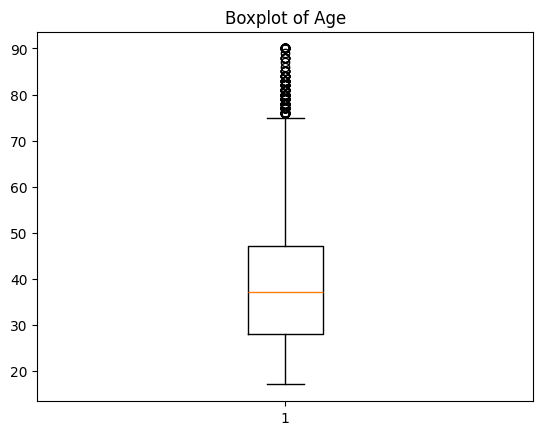

In [11]:
plt.boxplot(data['age'])
plt.title('Boxplot of Age')
plt.show()

In [12]:
data = data[(data['age'] <= 75) & (data['age'] >= 17)]

### 5. Feature Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = data.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

### 6. Model Training and Evaluation

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=['income'])
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

LogisticRegression Accuracy: 0.8133
RandomForest Accuracy: 0.8535
KNN Accuracy: 0.8234
SVM Accuracy: 0.8379
GradientBoosting Accuracy: 0.8571


### 7. Model Comparison - *New Section*

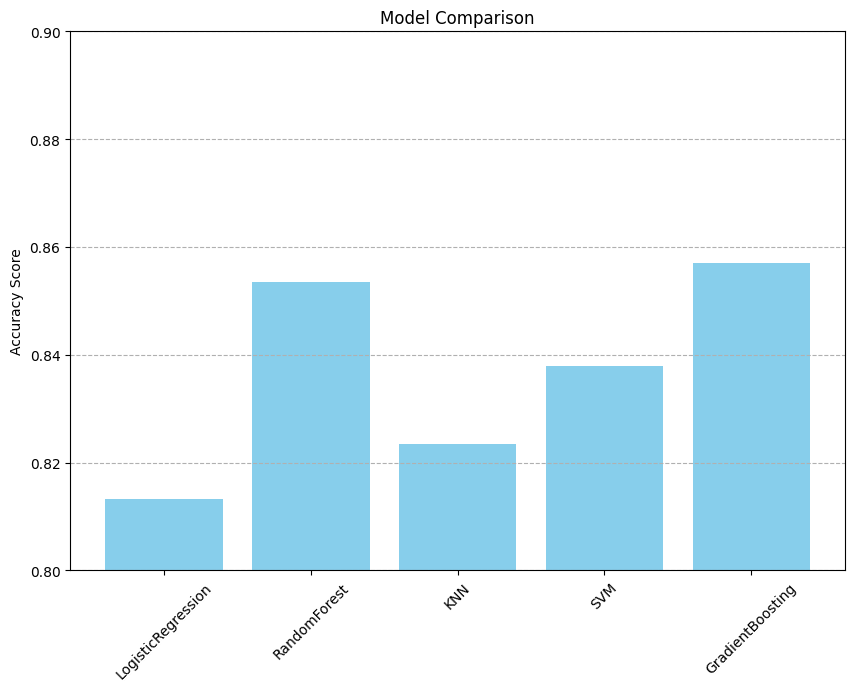

In [16]:
plt.figure(figsize=(10, 7))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.ylim(0.8, 0.9)
plt.show()

### 8. Saving the Best Model - *New Section*

In [17]:
import joblib

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the best model
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")


✅ Best model: GradientBoosting with accuracy 0.8571
✅ Saved best model as best_model.pkl


### 9. Making Predictions on New Data - *New Section*

In [18]:
# Load the saved model
loaded_model = joblib.load('best_model.pkl')

# Create a sample of new data (must have the same columns as X_train)
new_data = pd.DataFrame({
    'age': [35],
    'workclass': [2], # Example encoded value for 'Private'
    'fnlwgt': [150000],
    'educational-num': [13], # Example for 'Bachelors'
    'marital-status': [2], # Example for 'Married-civ-spouse'
    'occupation': [9], # Example for 'Prof-specialty'
    'relationship': [0], # Example for 'Husband'
    'race': [4], # Example for 'White'
    'gender': [1], # Example for 'Male'
    'capital-gain': [5000],
    'capital-loss': [0],
    'hours-per-week': [50],
    'native-country': [38] # Example for 'United-States'
})

# Scale the new data using the same scaler from training
new_data_scaled = scaler.transform(new_data)

# Make a prediction
prediction = loaded_model.predict(new_data_scaled)
print(f"Prediction for new data: {prediction} (which corresponds to '>50K')")

Prediction for new data: [1] (which corresponds to '>50K')
